In [1]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data = pd.read_csv("data/classdata-fixed.csv")
data = data.drop( 'Unnamed: 0', axis='columns')
data

,Ia,Ib,Ic,Va,Vb,Vc,fault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [3]:
fault1001 = data[data["fault"]==1001]
fault1011 = data[data["fault"]==1011]
fault0110 = data[data["fault"]==110]
fault0111 = data[data["fault"]==111]
fault1111 = data[data["fault"]==1111]
fault0 = data[data["fault"]==0]

In [4]:
feature_cols = data.columns[:-1]
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                         test_size=0.3,
                                         random_state=13)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.fault))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'fault']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'fault']

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [6]:
# try C=1 through C=30 and record testing accuracy
k_range = list(range(1, 10))
scores = []
for k in k_range:
    clf = make_pipeline(StandardScaler(), SVC(C=15, gamma=k))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

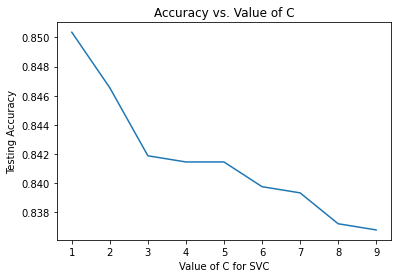

In [7]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C for SVC')
plt.ylabel('Testing Accuracy')

In [8]:
clf = make_pipeline(StandardScaler(), SVC(C=15))
clf.fit(X_train, y_train)

clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=15))])

In [9]:
clf.score(X_test, y_test)

0.8452734209410767

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

Text(132.0, 0.5, 'Truth')

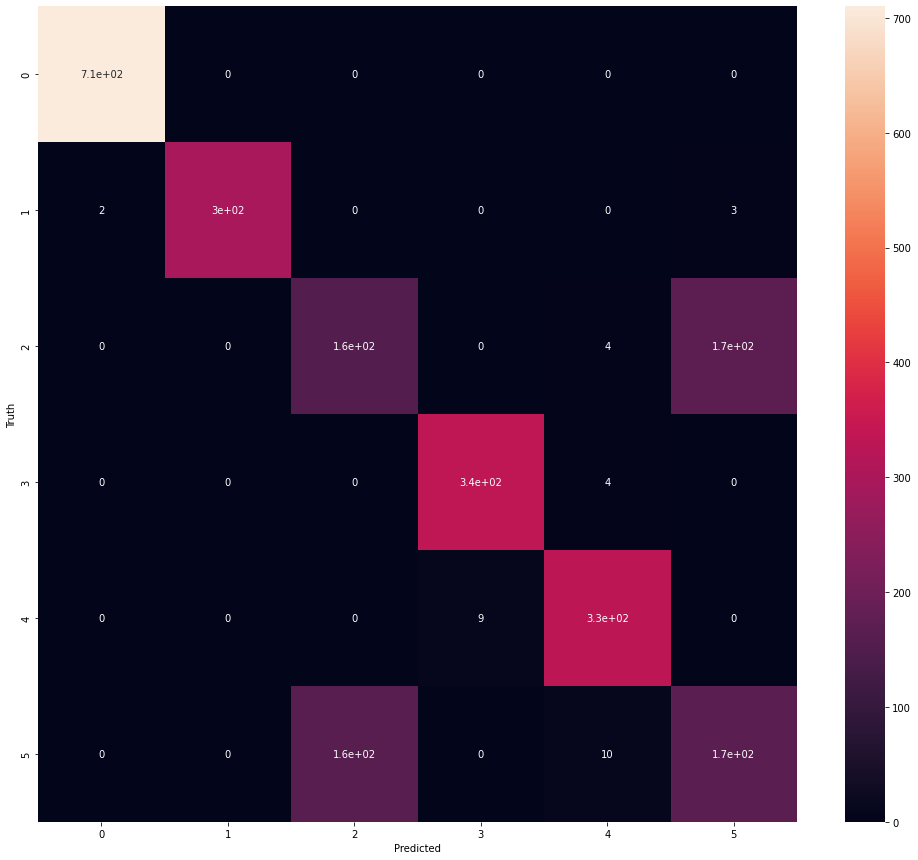

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(17,15))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
         110       1.00      0.98      0.99       301
         111       0.49      0.47      0.48       329
        1001       0.97      0.99      0.98       339
        1011       0.95      0.97      0.96       340
        1111       0.49      0.49      0.49       340

    accuracy                           0.85      2359
   macro avg       0.82      0.82      0.82      2359
weighted avg       0.84      0.85      0.84      2359

